In [2]:
# use SimFin free data to predict if a company is a tech company or not to explain machine learning concepts 
# of over/underfitting etc.

# Data free from https://simfin.com/data/bulk

In [3]:
# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

# Spot The Tech Company

## 1. Get The Data

In [4]:
import pandas as pd
import numpy as np

industries=pd.read_csv('industries.csv', delimiter=';')

us_companies=pd.read_csv('us-companies.csv', delimiter=';')

us_income_annual=pd.read_csv('us-income-annual.csv', delimiter=';')

In [5]:
industries.head()

,IndustryId,Sector,Industry
0,100001,Industrials,Industrial Products
1,100002,Industrials,Business Services
2,100003,Industrials,Engineering & Construction
3,100004,Industrials,Waste Management
4,100005,Industrials,Industrial Distribution


In [6]:
us_companies.head()

,Ticker,SimFinId,Company Name,IndustryId
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0
1,A21,1333027,Li Auto Inc.,NaN
2,AA,367153,Alcoa Corp,110004.0
3,AAC_delist,939324,"AAC Holdings, Inc.",106011.0
4,AAL,68568,American Airlines Group Inc.,100006.0


In [7]:
us_income_annual.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2016,FY,2016-10-31,2016-12-20,2018-12-20,326000000.0,329000000.0,...,-71000000.0,-61000000.0,544000000,NaN,544000000,-82000000.0,462000000,NaN,462000000,462000000
1,A,45846,USD,2017,FY,2017-10-31,2017-12-21,2018-12-20,322000000.0,326000000.0,...,-38000000.0,-57000000.0,803000000,NaN,803000000,-119000000.0,684000000,NaN,684000000,684000000
2,A,45846,USD,2018,FY,2018-10-31,2018-12-20,2020-12-18,321000000.0,325000000.0,...,42000000.0,-37000000.0,946000000,NaN,946000000,-630000000.0,316000000,NaN,316000000,316000000
3,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,-22000000.0,-38000000.0,919000000,NaN,919000000,152000000.0,1071000000,NaN,1071000000,1071000000
4,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2021-12-17,309000000.0,312000000.0,...,-4000000.0,-70000000.0,842000000,NaN,842000000,-123000000.0,719000000,NaN,719000000,719000000


## 2. Get The Prediction Classifications We Want From The Data (y)

In [8]:
data = us_income_annual.merge(us_companies, on='SimFinId')
data.head(5)

,Ticker_x,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Ticker_y,Company Name,IndustryId
0,A,45846,USD,2016,FY,2016-10-31,2016-12-20,2018-12-20,326000000.0,329000000.0,...,NaN,544000000,-82000000.0,462000000,NaN,462000000,462000000,A,AGILENT TECHNOLOGIES INC,106001.0
1,A,45846,USD,2017,FY,2017-10-31,2017-12-21,2018-12-20,322000000.0,326000000.0,...,NaN,803000000,-119000000.0,684000000,NaN,684000000,684000000,A,AGILENT TECHNOLOGIES INC,106001.0
2,A,45846,USD,2018,FY,2018-10-31,2018-12-20,2020-12-18,321000000.0,325000000.0,...,NaN,946000000,-630000000.0,316000000,NaN,316000000,316000000,A,AGILENT TECHNOLOGIES INC,106001.0
3,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,NaN,919000000,152000000.0,1071000000,NaN,1071000000,1071000000,A,AGILENT TECHNOLOGIES INC,106001.0
4,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2021-12-17,309000000.0,312000000.0,...,NaN,842000000,-123000000.0,719000000,NaN,719000000,719000000,A,AGILENT TECHNOLOGIES INC,106001.0


In [9]:
# Merge the income statement data rows with the companies data
data = us_income_annual.merge(us_companies, on='SimFinId')

# Identify the companies that are tech companies. 
# Use the "industries" data to find the tech company numerical codes.
data['isTech'] = data['IndustryId'].isin([101001,
                                          101002,
                                          101003,
                                          101004,
                                          101005])

# Make the Tech/nonTech split in the data 50/50
dataA=data[data['isTech'] == True].copy()
dataB=data[data['isTech'] == False].sample(dataA.shape[0]).copy()
data = pd.concat([dataA, dataB]) # note the "data" DataFrame is smaller.

print('Rows (instances) of data that we can work with: ', 
      data.shape[0])

print('\nColumns to our data: ', 
      data.shape[1], 
      '\n\nOf which the column keys are:\n' , 
      data.keys())

Rows (instances) of data that we can work with:  4112

Columns to our data:  32 

Of which the column keys are:
 Index(['Ticker_x', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Ticker_y', 'Company Name', 'IndustryId', 'isTech'],
      dtype='object')


## 3. Get The Features We Want From The Data (X)

In [10]:
data2 = pd.DataFrame()

data2['Gross Profit/Rev.'] = data['Gross Profit']/data['Revenue']

data2['Cost of Revenue/Rev.'] = data['Cost of Revenue']/data['Revenue']

data2['Operating Expenses/Rev.'] = data['Operating Expenses']/data['Revenue']

data2['Selling, General & Administrative/Rev.'] = \
    data['Selling, General & Administrative']/data['Revenue']

data2['Research & Development/Rev.'] = \
    data['Research & Development']/data['Revenue']

data2['Operating Income (Loss)/Rev.'] = \
    data['Operating Income (Loss)']/data['Revenue']

data2['Non-Operating Income (Loss)/Rev.'] = \
    data['Non-Operating Income (Loss)']/data['Revenue']

data2['Net Income/Rev.'] = data['Net Income']/data['Revenue']

data2 = data2.fillna(0).clip(-1,1)

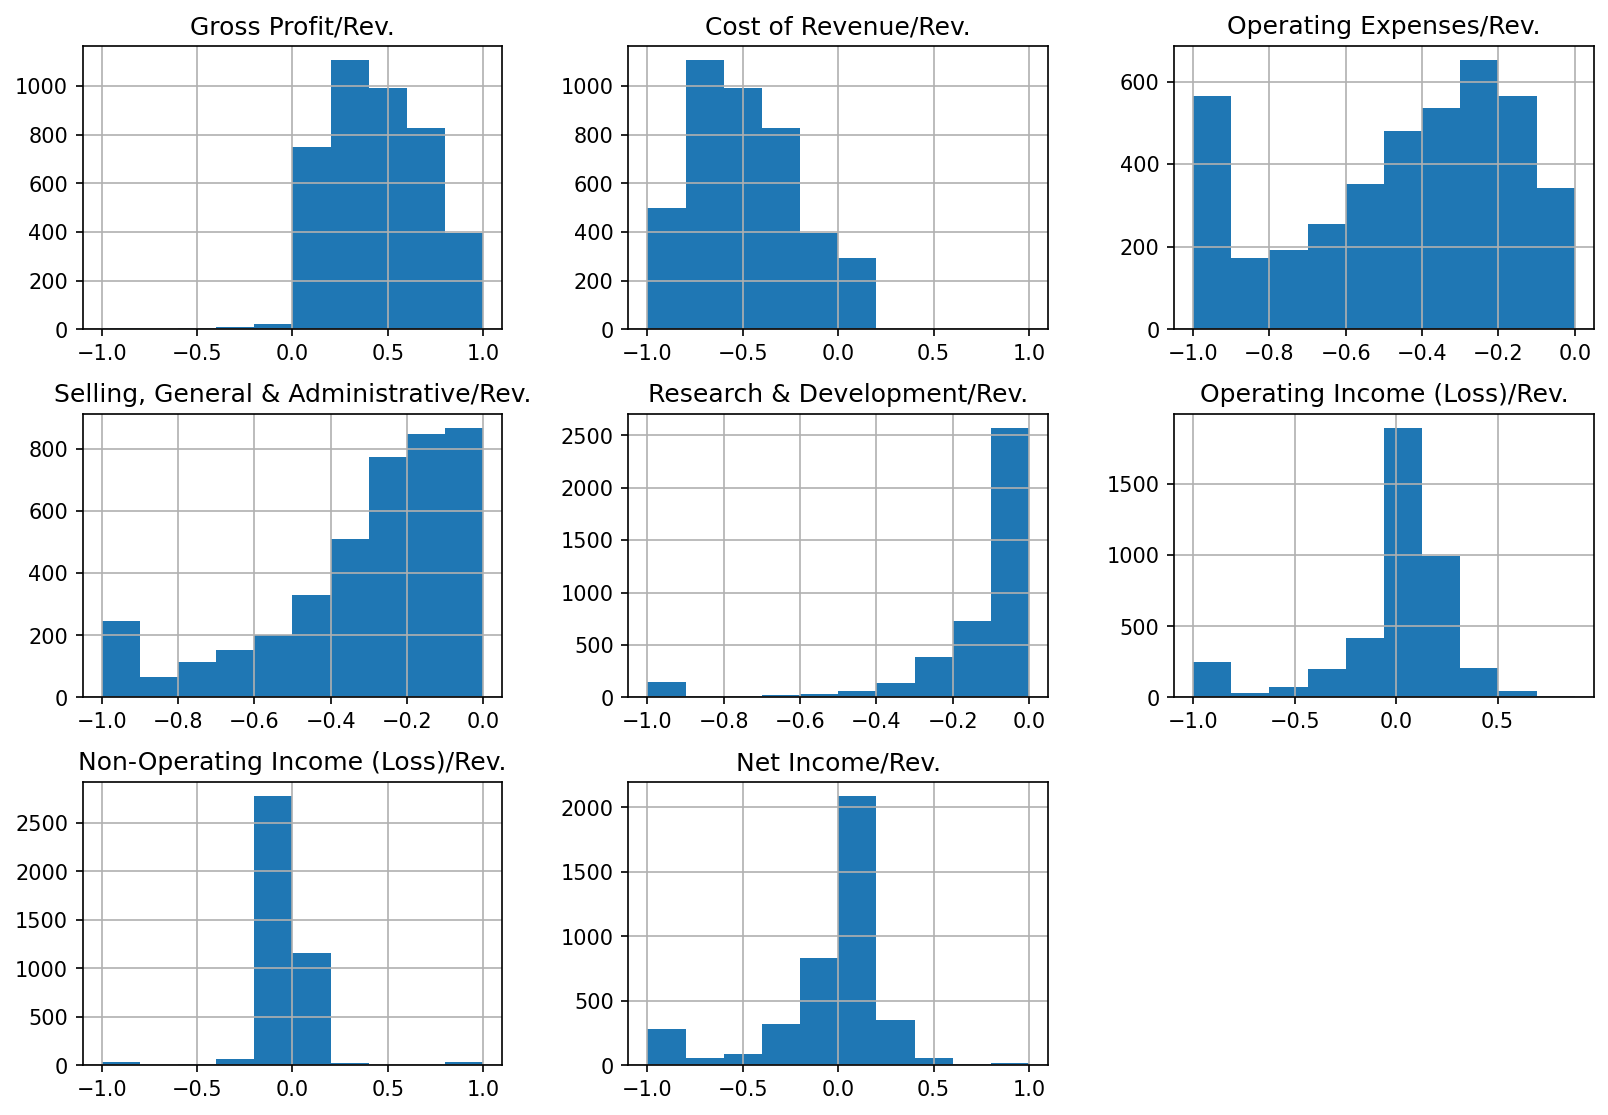

In [11]:
data2.hist(figsize=(13,9));

In [12]:
# Create "y" for the algorithm
targets = pd.DataFrame()
targets = data['isTech']
targets.value_counts()

True     2056
False    2056
Name: isTech, dtype: int64

In [13]:
data2.to_csv('techNoTech_X.csv')
targets.to_csv('techNoTech_y.csv')

## 4. Train Our Models On The Data For Prediction

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

def plotLearningCurve(clf, X, y, 
                      train_sizes=[0.005, 0.01, 0.015, 0.02, 
                                   0.025, 0.03, 0.035, 0.2], 
                      lowerBetter=False, 
                      marker1='-x', marker2='-o'):
    '''
    Learning Curve Function.
    Specify the model, X, y, and this function will plot out the 
    Learning Curve
    '''
    # Create Learning Curve
    train_sizes, train_scores, valid_scores = \
    learning_curve(clf, X, y, 
                   cv=ShuffleSplit(n_splits=5,
                                   test_size=0.2,
                                   random_state=42),
                   train_sizes=train_sizes)
    
    # Plot the Learning Curve for train/test datasets
    plt.plot(train_sizes, train_scores.mean(axis=1), marker1)
    plt.fill_between(train_sizes,
                     train_scores.mean(axis=1)-train_scores.std(axis=1),
                     train_scores.mean(axis=1)+train_scores.std(axis=1),
                     alpha=0.2)
    plt.plot(train_sizes, valid_scores.mean(axis=1), marker2)
    plt.fill_between(train_sizes,
                     valid_scores.mean(axis=1)-valid_scores.std(axis=1),
                     valid_scores.mean(axis=1)+valid_scores.std(axis=1),
                     alpha=0.2)
    
    if lowerBetter: # If we want to flip the plot y-axis
        plt.gca().invert_yaxis()

    plt.grid()
    

def plotValidationCurve(clf, X, y, varName, 
                        variableVals=[2, 4, 6, 12, 15, 20], 
                        lowerBetter=False):
    '''
    Validation Curve Function.
    Specify the model, X, y, and this function will plot out the 
    Validation Curve
    '''
    # Create Validation Curve
    train_scores, valid_scores = \
    validation_curve(clf, data2, targets, 
                     param_name = varName,
                     param_range = variableVals,
                     cv=ShuffleSplit(n_splits=5,
                                     test_size=0.2,
                                     random_state=42))
    
    # Plot the Validation Curve for train/test datasets
    plt.plot(variableVals, train_scores.mean(axis=1), '-x')
    plt.fill_between(variableVals,
                     train_scores.mean(axis=1)-train_scores.std(axis=1),
                     train_scores.mean(axis=1)+train_scores.std(axis=1),
                     alpha=0.2)
    plt.plot(variableVals, valid_scores.mean(axis=1), '-o')
    plt.fill_between(variableVals,
                     valid_scores.mean(axis=1)-valid_scores.std(axis=1),
                     valid_scores.mean(axis=1)+valid_scores.std(axis=1),
                     alpha=0.2)
    
    if lowerBetter:  # If we want to flip the plot y-axis
        plt.gca().invert_yaxis()

    plt.grid()

## 4.1 Learning/Validation Curves For A Decision Tree

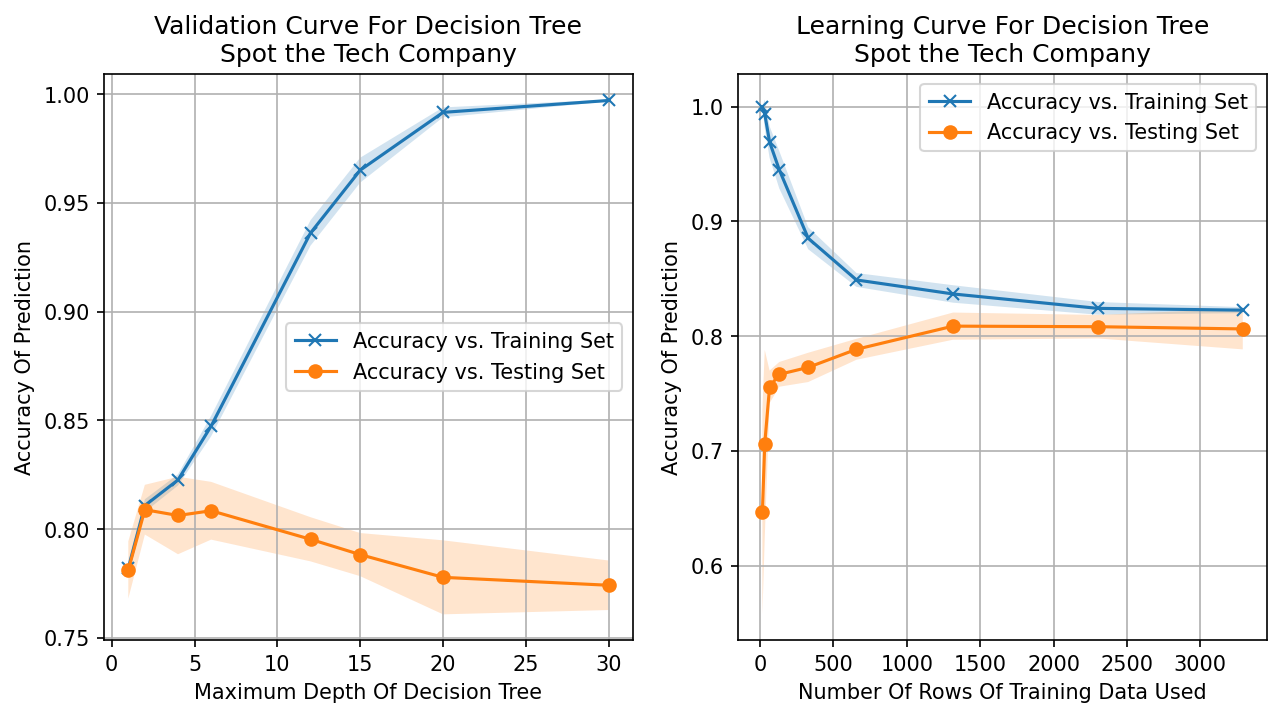

In [15]:
# Create the Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=4)

plt.figure(figsize=(10,5)) # Make the plot figure.

# Validation Curve - check if model is learning from the data optimally
plt.subplot(1,2,1)
plotValidationCurve(clf, data2, targets, 'max_depth', 
                    variableVals = [1, 2, 4, 6, 12, 15, 20, 30])
plt.title('Validation Curve For Decision Tree\nSpot the Tech Company')
plt.xlabel('Maximum Depth Of Decision Tree')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

# max_depth=4 is good, next Learning Curve.
# Learning Curve - to check if data is OK
plt.subplot(1,2,2)
train_sizes=[0.005, 0.01, 0.02, 0.04, 
             0.1, 0.2, 0.4, 0.7, 1] # How large the learning data is.
plotLearningCurve(clf, data2, targets, train_sizes)
plt.title('Learning Curve For Decision Tree\nSpot the Tech Company')
plt.xlabel('Number Of Rows Of Training Data Used')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set']);

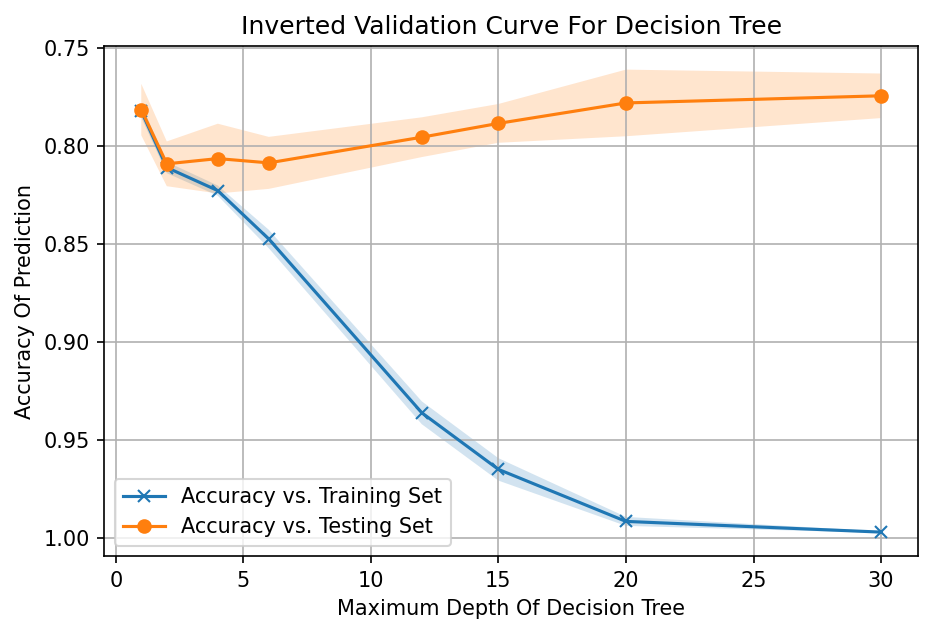

In [16]:
# validation curve - check if model is learning from the data optimally
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
plotValidationCurve(clf, data2, targets, 'max_depth', 
                    variableVals = [1, 2, 4, 6, 12, 15, 20, 30], lowerBetter=True)
#plt.yscale('log')
plt.title('Inverted Validation Curve For Decision Tree')
plt.xlabel('Maximum Depth Of Decision Tree')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

# Diagnosis with Learning/Validation Curves
### What If There Isn't Enough Data?

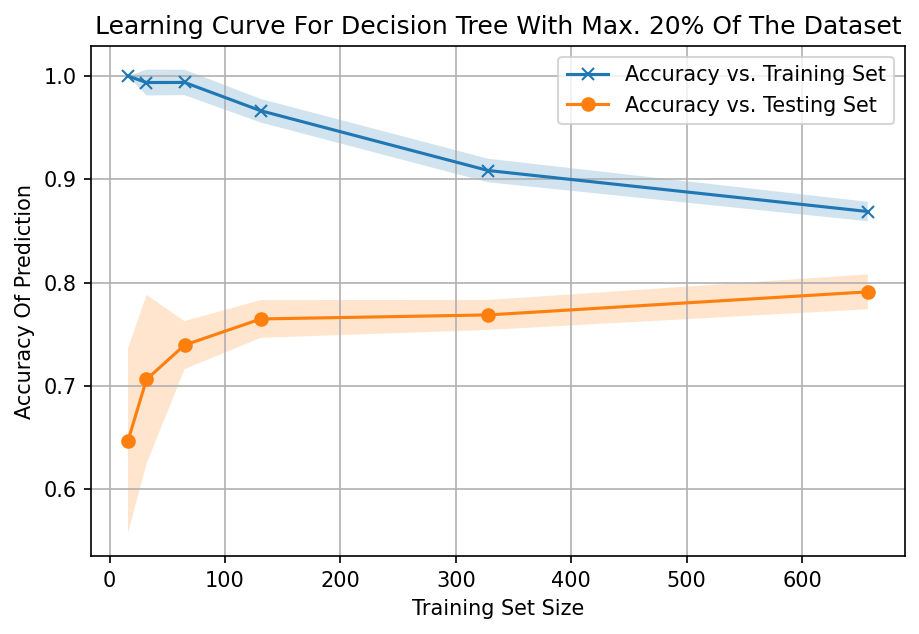

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

train_sizes=[0.005, 0.01, 0.02, 0.04, 0.1, 0.2]
plotLearningCurve(clf, data2, targets, train_sizes)

plt.title('Learning Curve For Decision Tree With Max. 20% Of The Dataset')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set']);

### What If The Data Isn't Good Quality?

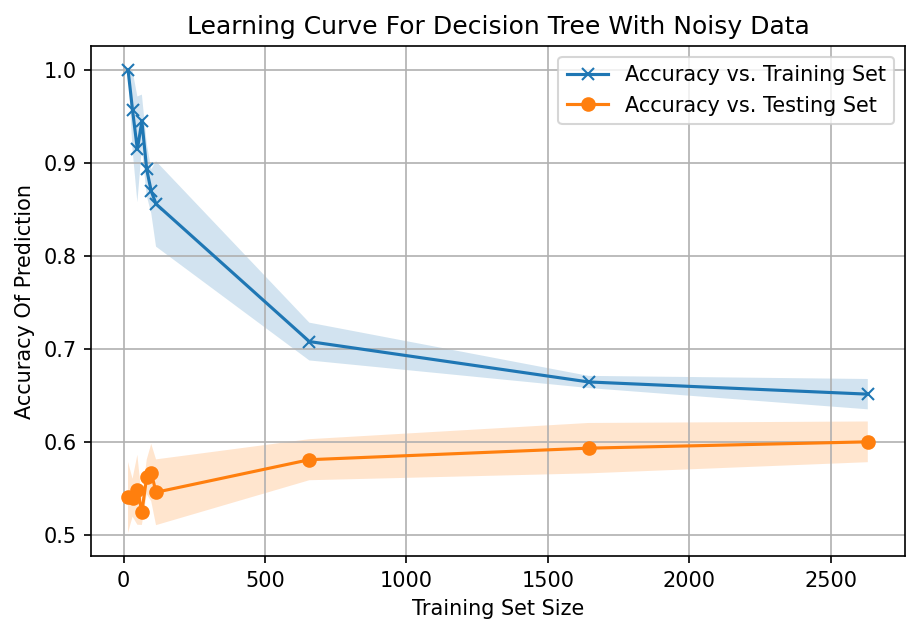

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

train_sizes=[0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.5, 0.8]
plotLearningCurve(clf, 
                  data2 + np.random.rand(data2.shape[0], data2.shape[1]), 
                  targets, 
                  train_sizes) # lower accuracy

plt.title('Learning Curve For Decision Tree With Noisy Data')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set']);

### Is The Model Overfitting, With High Variance? Is It Bad?

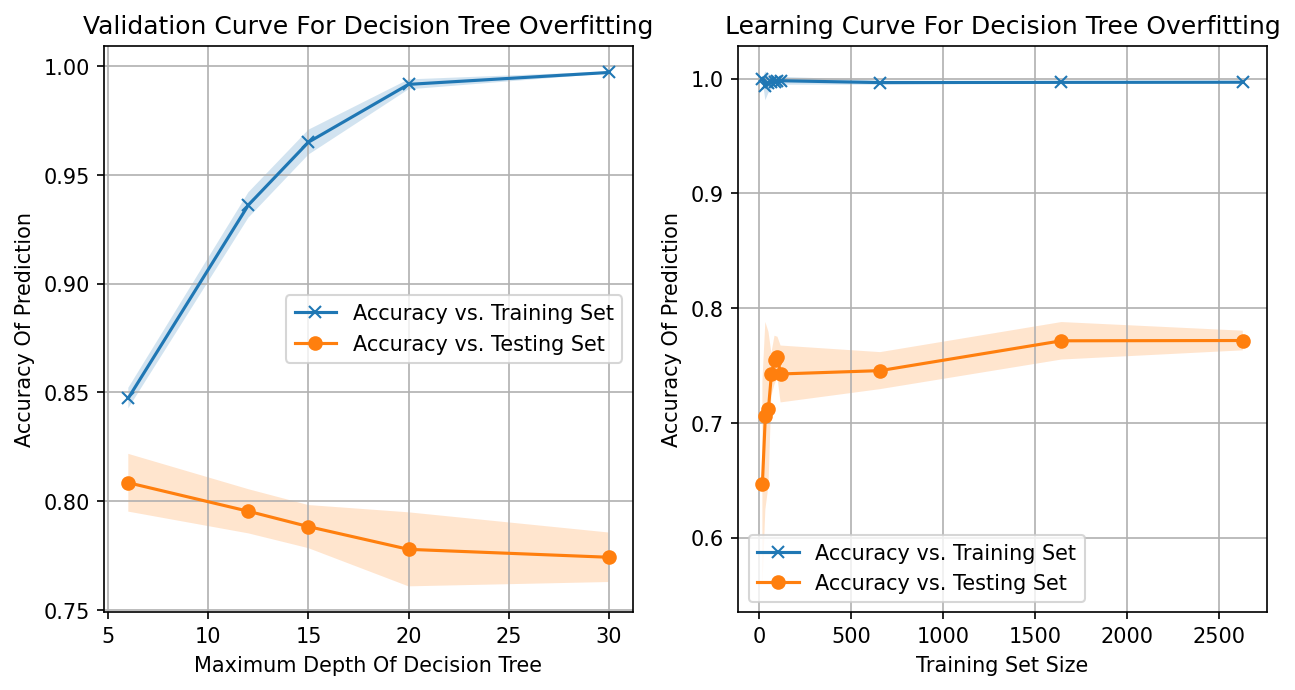

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
plt.figure(figsize=(10,5))

# validation curve, trying large max_depth to  see overfitting
# decision trees
plt.subplot(1,2,1)
plotValidationCurve(clf, 
                    data2, 
                    targets, 
                    'max_depth', 
                    variableVals = [6, 12, 15, 20, 30])

plt.title('Validation Curve For Decision Tree Overfitting')
plt.xlabel('Maximum Depth Of Decision Tree')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

# learning curve, for a decision tree that is obviously 
# overfitting the data
plt.subplot(1,2,2)
clf = DecisionTreeClassifier(random_state=42, 
                             max_depth=30)

train_sizes=[0.005,0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.5, 0.8]
plotLearningCurve(clf, 
                  data2, 
                  targets, 
                  train_sizes)
plt.title('Learning Curve For Decision Tree Overfitting')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

### Is The Model Underfitting, With High Bias?

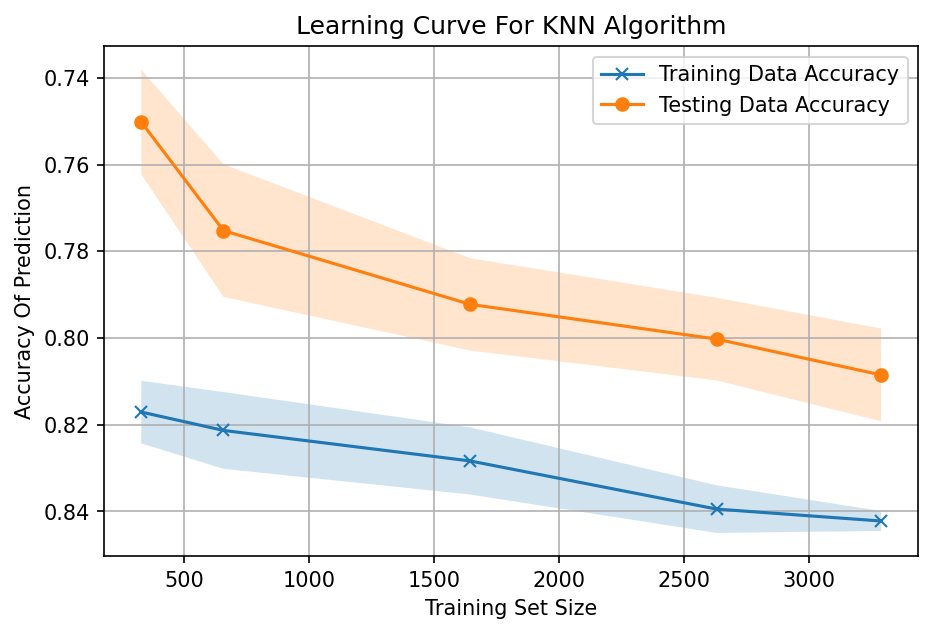

In [20]:
# Try the KNN regressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# High K and low K-Nearest Neighbours
clf1 = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=10))

train_sizes=[0.1, 0.2, 0.5, 0.8, 1]
plotLearningCurve(clf1, data2, targets, train_sizes, marker1='-x', marker2='-o', lowerBetter=True)
plt.title('Learning Curve For KNN Algorithm')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Training Data Accuracy','Testing Data Accuracy'])

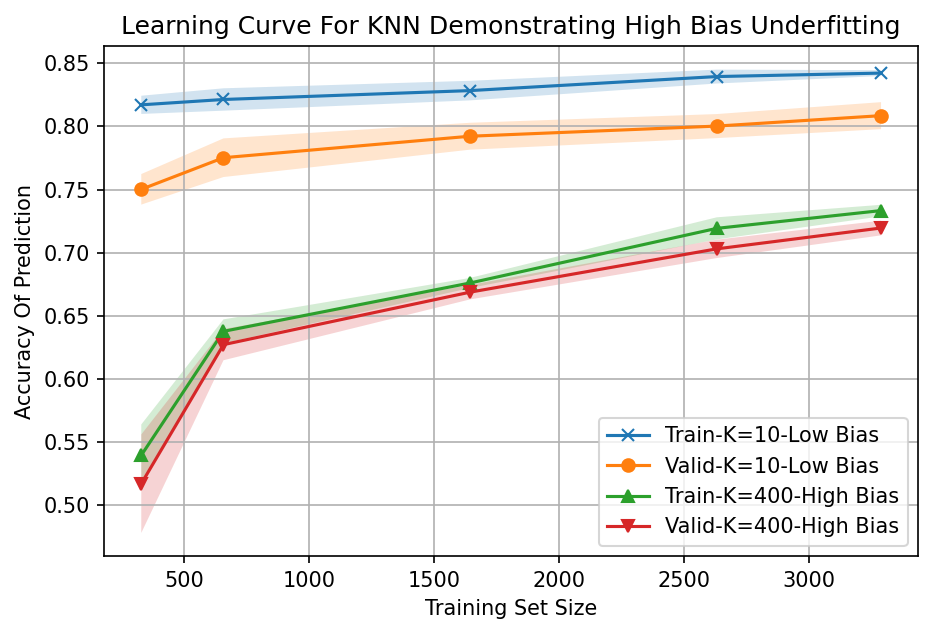

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# High K and low K-Nearest Neighbours
clf1 = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=10))

clf2 = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=300))

train_sizes=[0.1, 0.2, 0.5, 0.8, 1]
plotLearningCurve(clf1, data2, targets, train_sizes, marker1='-x', marker2='-o');
plotLearningCurve(clf2, data2, targets, train_sizes, marker1='-^', marker2='-v');
plt.title('Learning Curve For KNN Demonstrating High Bias Underfitting')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Train-K=10-Low Bias','Valid-K=10-Low Bias','Train-K=400-High Bias','Valid-K=400-High Bias'])
plt.grid()

### Is Everything Optimal? The Bias-Variance Tradeoff

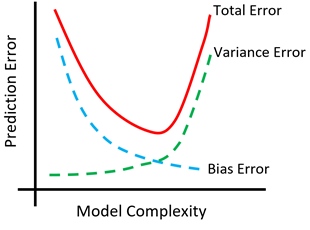

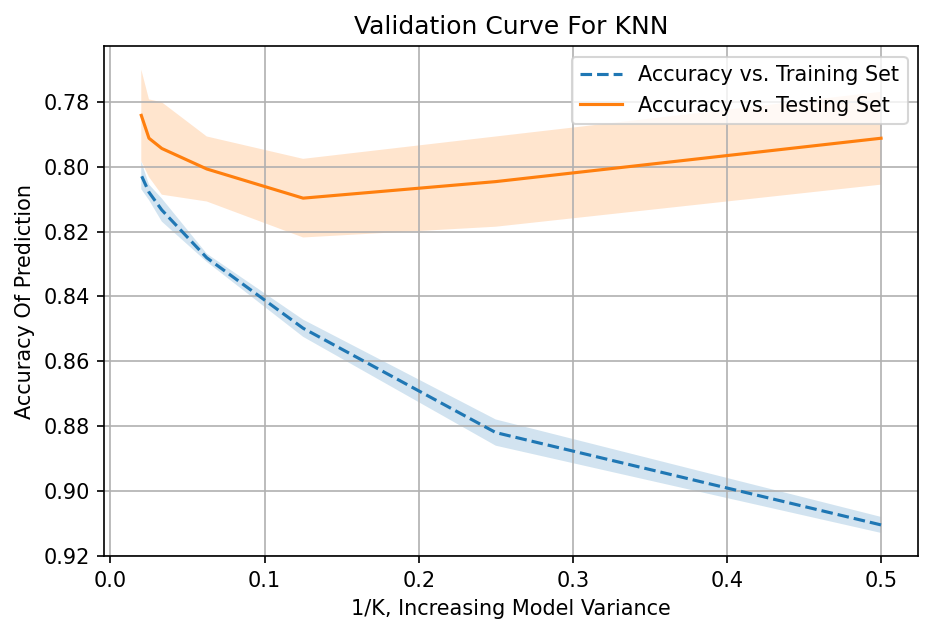

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

clf = make_pipeline(StandardScaler(),
                    KNeighborsClassifier(n_neighbors=5))

variableVals = [2, 4, 8, 16, 30, 40, 50] # KNN increase k, variance goes down.

train_scores, valid_scores = \
validation_curve(clf, data2, targets,
                 param_name = 'kneighborsclassifier__n_neighbors',
                 param_range = variableVals,
                 cv=ShuffleSplit(n_splits=5,
                                 test_size=0.2,
                                 random_state=42))

variableVals=[1/i for i in variableVals]
plt.plot(variableVals, train_scores.mean(axis=1),'--')
plt.fill_between(variableVals,
                 train_scores.mean(axis=1)-train_scores.std(axis=1),
                 train_scores.mean(axis=1)+train_scores.std(axis=1), 
                 alpha=0.2)
plt.plot(variableVals, valid_scores.mean(axis=1))
plt.fill_between(variableVals,
                 valid_scores.mean(axis=1)-valid_scores.std(axis=1),
                 valid_scores.mean(axis=1)+valid_scores.std(axis=1), 
                 alpha=0.2)
plt.gca().invert_yaxis()
plt.grid()
plt.title('Validation Curve For KNN')
plt.xlabel('1/K, Increasing Model Variance')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set']);

# See Some Predictions

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5).fit(data2, targets)

msftData = {'Gross Profit/Rev.':[96937/143015],
            'Cost of Revenue/Rev.':[46078/143015],
            'Operating Expenses/Rev.':[(19269+19598+5111)/143015],
            'Selling, General & Administrative/Rev.':[5111/143015],
            'Research & Development/Rev.':[19269/143015],
            'Operating Income (Loss)/Rev.':[52959/143015],
            'Non-Operating Income (Loss)/Rev.':[77/143015],
            'Net Income/Rev.':[44281/143015]}

msft = pd.DataFrame(msftData)
msft = msft.fillna(0).clip(-1,1)

clf.predict(msft) # True = Tech Company.

array([False])

In [30]:
def createMyRatios(inputCompanyData):
    companyRatios = pd.DataFrame()

    companyRatios['Gross Profit/Rev.'] = \
    inputCompanyData['Gross Profit']/inputCompanyData['Revenue']

    companyRatios['Cost of Revenue/Rev.'] = \
    inputCompanyData['Cost of Revenue']/inputCompanyData['Revenue']

    companyRatios['Operating Expenses/Rev.'] = \
    inputCompanyData['Operating Expenses']/inputCompanyData['Revenue']

    companyRatios['Selling, General & Administrative/Rev.'] = \
    inputCompanyData['Selling, General & Administrative']/\
        inputCompanyData['Revenue']

    companyRatios['Research & Development/Rev.'] = \
    inputCompanyData['Research & Development']/inputCompanyData['Revenue']

    companyRatios['Operating Income (Loss)/Rev.'] = \
    inputCompanyData['Operating Income (Loss)']/inputCompanyData['Revenue']

    companyRatios['Non-Operating Income (Loss)/Rev.'] = \
    inputCompanyData['Non-Operating Income (Loss)']/inputCompanyData['Revenue']

    companyRatios['Net Income/Rev.'] = \
    inputCompanyData['Net Income']/inputCompanyData['Revenue']

    return companyRatios.fillna(0).clip(-1,1)

In [31]:
# Companies we have.
for i in data['Ticker_x'].unique(): print(i)

AAOI
AAPL
ABTL
ACIA
ACIW
ACLS
ADBE
ADI
ADSK
ADT
ADTN
AEHR
AEIS
AGYS
AI
AKAM
ALRM
ALTR
AMAT
AMBA
AMD
AMKR
AMOT
AMPL
AMSC
AMSWA
ANET
ANGI
ANSS
ANY
AOSL
APH
APPF
APPS
APTI
ARLO
ARW
ASAN
ASYS
ATHN_delis
ATVI
AVGO
AVLR
AVNW
AVT
AVYA
AWRE
AXTI
AYX
AZPN
BB
BHE
BKI
BKTI
BL
BLKB
BLOX
BMI
BNFT
BOX
BOXL
BRCD
BRKS
BSQR
BSY
BVSN
BV_old
CA
CACI
CALD
CALX
CAMP
CARG
CASA
CAVM
CBLK
CCMP
CDAY
CDK
CDNS
CDW
CERN
CEVA
CFLT
CGNX
CHNG
CIEN
CLDR
CLFD
CLVT
CMBM
CMRO
CMTL
CNXC
COHR
COMM
COTV
COUP
COVS
CPSI
CRAY
CREE
CRM
CRNC
CRTO
CRUS
CRWD
CSCO
CSGS
CSLT
CSOD
CSRA
CTLP
CTSH
CTXS
CVLT
CVT
CXM
CY
DASH
DATA
DBD
DBX
DDD
DDOG
DELL
DMRC
DOCN
DOCU
DOMO
DT
DTRM
DZSI
EA
EB
EBIX
EGAN
EGHT
EIGI
ELLI
ENPH
ENR
ENS
ENV
EPAY
ESP
ESTC
EVBG
EVH
EVOP
EXA
EXTR
FARO
FB
FEIM
FFIV
FICO
FIT
FIVN
FKWL
FLEX
FLIR
FLLC
FNJN
FNSR
FORM
FOUR
FROG
FSCT
FSLR
FSLY
FTNT
FTV
GDDY
GIMO
GLUU
GLW
GOOG
GPRO
GRMN
GRPN
GRUB
GSIT
GUID
GWRE
HAR
HDP
HEAR
HPE
HPJ
HPQ
HQY
HSTM
HUBS
HURC
IAC
IAS
IBM
IDSY
IEHC
IIN
IMPV
INFN
INOD
INOV
INTC
INTT
INTU
IOTS
IPDN

In [47]:
# Examples non-tech companies:
# MCD https://corporate.mcdonalds.com/corpmcd/investors.html
# KO https://investors.coca-colacompany.com/
# OXY https://www.oxy.com/investors/
# CROX https://investors.crocs.com/overview/default.aspx

nonTechCompany = data[data['Ticker_x']=='MCD'] #MCD, KO, OXY, CROX, etc.

clf.predict(createMyRatios(nonTechCompany)) # Tech Company?

array([False])

In [52]:
# Examples tech companies:
# AAPL https://investor.apple.com/investor-relations/default.aspx
# MSFT https://www.microsoft.com/en-us/investor
# AMD https://ir.amd.com/
# GOOG https://abc.xyz/investor/
# TSLA https://ir.tesla.com/#tab-quarterly-disclosure

techCompany = data[data['Ticker_x']=='PINS'] #AAPL, MSFT, AMD, GOOG, TSLA, etc.

clf.predict(createMyRatios(techCompany)) # Tech Company?

array([ True, False,  True])

In [37]:
# Try changing the max_depth Hyperparameter
clf = DecisionTreeClassifier(random_state=42, 
                             max_depth=4).fit(data2, targets)
techCompany = data[data['Ticker_x']=='AAPL'] #AAPL
clf.predict(createMyRatios(techCompany)) # Tech Company?

array([ True,  True,  True,  True,  True])